In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('titanic')

Exploring Data

In [ ]:
df.shape


(891, 15)

In [ ]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


Cleaning data

In [ ]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
drop_columns = ['embarked', 'deck', 'embark_town']
df = df.drop(drop_columns,axis=1)

In [ ]:
df.isnull().sum()

survived        0
pclass          0
sex             0
age           177
sibsp           0
parch           0
fare            0
class           0
who             0
adult_male      0
alive           0
alone           0
dtype: int64

In [ ]:
df['Family_Size'] = df['sibsp'] + df['parch']
df

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,alive,alone,Family_Size
0,0,3,male,22.0,1,0,7.2500,Third,man,True,no,False,1
1,1,1,female,38.0,1,0,71.2833,First,woman,False,yes,False,1
2,1,3,female,26.0,0,0,7.9250,Third,woman,False,yes,True,0
3,1,1,female,35.0,1,0,53.1000,First,woman,False,yes,False,1
4,0,3,male,35.0,0,0,8.0500,Third,man,True,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Second,man,True,no,True,0
887,1,1,female,19.0,0,0,30.0000,First,woman,False,yes,True,0
888,0,3,female,NaN,1,2,23.4500,Third,woman,False,no,False,3
889,1,1,male,26.0,0,0,30.0000,First,man,True,yes,True,0


Visualizations


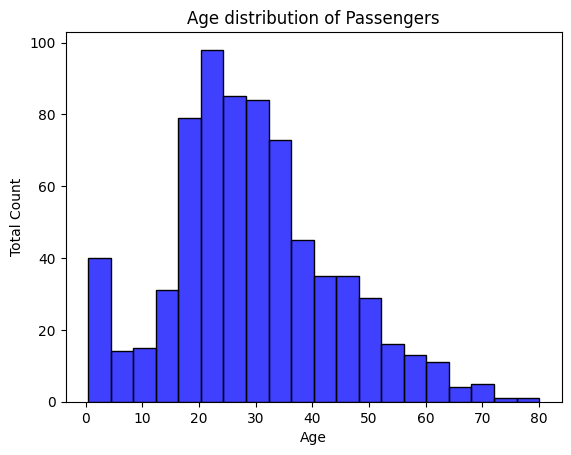

In [ ]:
#histogram of age distribution
ax = sns.histplot(data = df, x = 'age', color='blue')
plt.title('Age distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Total Count')
plt.show()


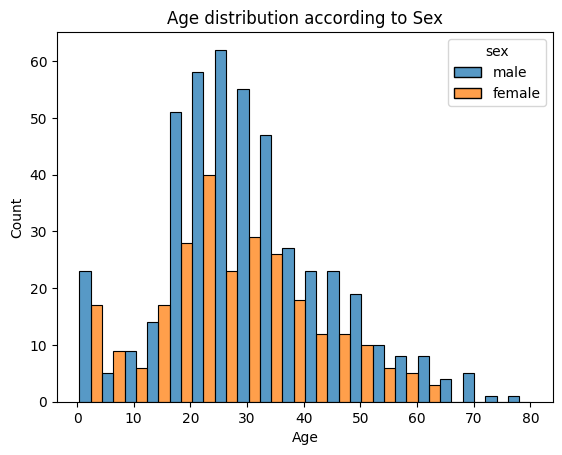

In [ ]:
#box plot
sns.histplot(data = df, x = 'age', hue = 'sex', multiple='dodge')
plt.title('Age distribution according to Sex')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


<ipython-input-26-a15e42a5a9f8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='Reds')


<Axes: >

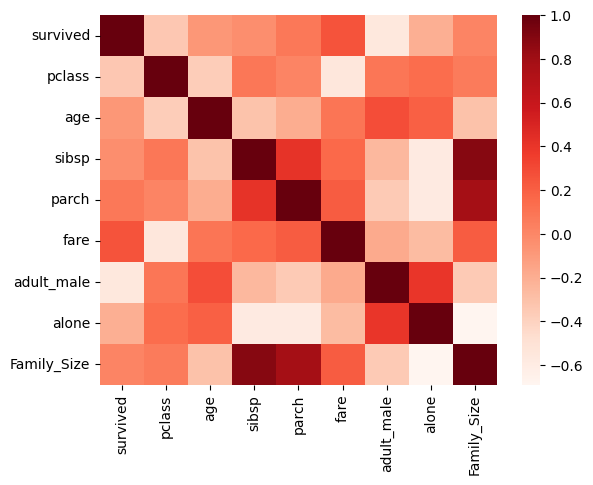

In [ ]:
#heatmap
sns.heatmap(df.corr(),cmap='Reds')

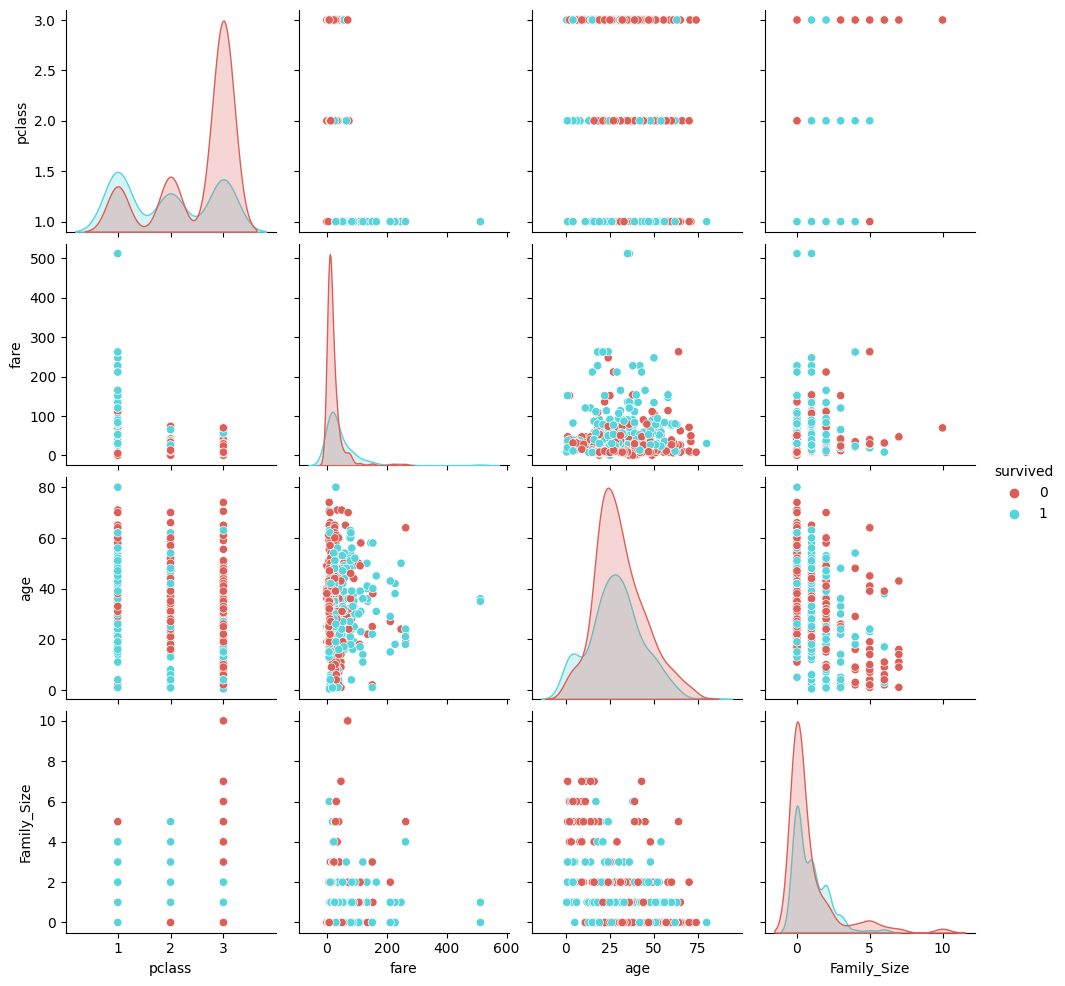

In [ ]:
#pairplot
sns.pairplot(df, hue='survived', vars=['pclass', 'fare', 'age','Family_Size'],
             palette='hls')
plt.show()